In [1]:
import json
import os
import sys

import matplotlib.pyplot as plt
import pandas as pd

sys.path.append(os.path.abspath(".."))

from config import (
    RECOMMENDER_EVAL_PATH,
    RECOMMENDATIONS_KEY_BASELINE,
    RECOMMENDATIONS_KEY_CF,
    RECOMMENDATIONS_KEY_CB_TITLE,
    RECOMMENDATIONS_KEY_CB_DESCR,
    RECOMMENDATIONS_KEY_CB_COMBI,
    RECOMMENDATIONS_KEY_HYBRID,
)

This notebook is used for visualizing the results.

### Main results

In [7]:
# loading evaluation results
with open("../" + RECOMMENDER_EVAL_PATH, "r") as file:
    eval_data = json.load(file)

# converting the dictionary to a dataframe
records = []
for recommender, levels in eval_data.items():
    for level, metrics in levels.items():
        record = {
            "recommender": recommender,
            "level": f"@{level}",
            "Hit-rate": metrics.get("hit_rate", None),
            "NDCG": metrics.get("ndcg", None),
            "Diversity": metrics.get("diversity", None)
        }
        records.append(record)
eval_df = pd.DataFrame(records)

# renaming the recommenders
eval_df["recommender"] = eval_df["recommender"].replace({
    RECOMMENDATIONS_KEY_BASELINE: "Baseline",
    RECOMMENDATIONS_KEY_CF: "CF",
    RECOMMENDATIONS_KEY_CB_TITLE: "CB (title)",
    RECOMMENDATIONS_KEY_CB_DESCR: "CB (description)",
    RECOMMENDATIONS_KEY_CB_COMBI: "CB (combi)",
    RECOMMENDATIONS_KEY_HYBRID: "Hybrid"
})


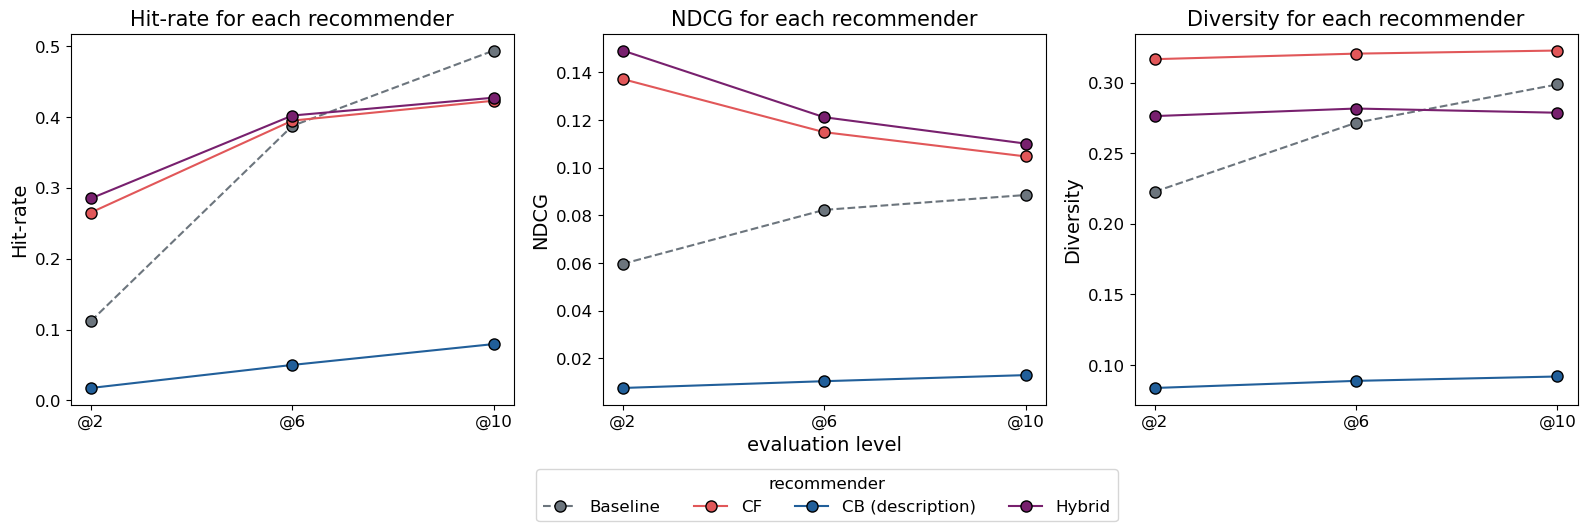

In [ ]:
# initializing subplot
nrows, ncols = 1, 3
fig, axes = plt.subplots(nrows, ncols, figsize=(16, 5))

# colors
format_mapping = {
    "Baseline": ("#6c757d", "--"),  
    "CF": ("#E15759", "-"),
    "CB (description)": ("#215F9A", "-"),
    "Hybrid": ("#78206E", "-")
}

# evaluation metrics
eval_metrics = ["Hit-rate", "NDCG", "Diversity"]

# plotting line charts for each recommender for each evaluation metric
for i, metric in enumerate(eval_metrics):
    ax = axes[i]
    ax.set_title(f"{metric} for each recommender", fontsize=15)
    ax.set_ylabel(f"{metric}", fontsize=14)
    ax.tick_params(axis="x", labelsize=12)
    ax.tick_params(axis="y", labelsize=12) 

    # adding label on x-axis for middle subplot
    if i == 1:
        ax.set_xlabel("evaluation level", fontsize=14)
        
    for recommender, formats in format_mapping.items():
        data = eval_df[eval_df["recommender"] == recommender]
        levels = data["level"]
        metric_values = data[f"{metric}"]
        color, linestyle = formats
        ax.plot(levels, metric_values, marker="o", label=recommender, c=color, markeredgecolor="black", markersize=8, linestyle=linestyle)

# adding legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, format_mapping.keys(), 
           title="recommender", 
           loc="lower center", 
           ncol=4, 
           fontsize=12, 
           title_fontsize=12,
           bbox_to_anchor=(0.52, -0.07))

plt.tight_layout(rect=[0, 0.05, 1, 1])  
plt.show()

### Comparing CB recommenders

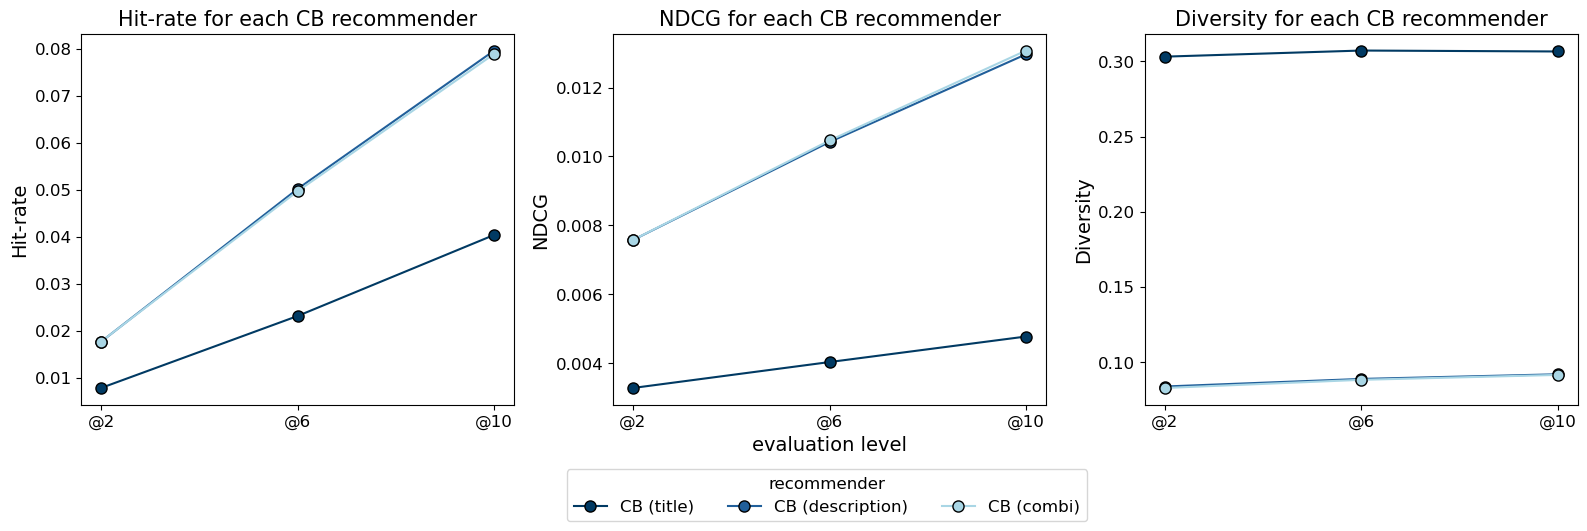

In [ ]:
# initializing subplot
nrows, ncols = 1, 3
fig, axes = plt.subplots(nrows, ncols, figsize=(16, 5))

# colors
color_mapping = {
    "CB (title)": "#013a63",  
    "CB (description)": "#215F9A",
    "CB (combi)": "#a9d6e5"
}

# plotting line charts for each recommender for each evaluation metric
for i, metric in enumerate(eval_metrics):
    ax = axes[i]
    ax.set_title(f"{metric} for each CB recommender", fontsize=15)
    ax.set_ylabel(f"{metric}", fontsize=14)
    ax.tick_params(axis="x", labelsize=12)
    ax.tick_params(axis="y", labelsize=12) 

    # adding label on x-axis for middle subplot
    if i == 1:
        ax.set_xlabel("evaluation level", fontsize=14)
        
    for recommender, color in color_mapping.items():
        data = eval_df[eval_df["recommender"] == recommender]
        levels = data["level"]
        metric_values = data[f"{metric}"]
        ax.plot(levels, metric_values, marker="o", label=recommender, c=color, markeredgecolor="black", markersize=8)

# adding legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, color_mapping.keys(), 
           title="recommender", 
           loc="lower center", 
           ncol=4, 
           fontsize=12, 
           title_fontsize=12,
           bbox_to_anchor=(0.52, -0.07))

plt.tight_layout(rect=[0, 0.05, 1, 1])  
plt.show()